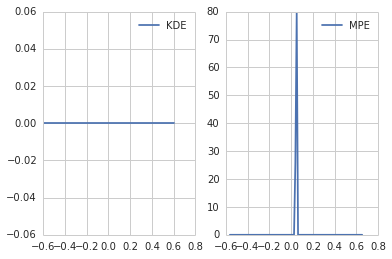

In [75]:
import numpy as np
from sklearn.neighbors import KernelDensity
import math
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
import seaborn as sns
# Implemented from Vincent, Pascal, and Yoshua Bengio. Manifold parzen windows. Advances in neural information processing systems. 2002.

# Algorithm for Local Gaussian
def LocalGaussian(xTest, Xi, Vi, lambdai, d, var, n):
    
    # Define the variables.
    r = 0
    q = 0
    
    # Step 1:
    #r = d* math.log(2*math.pi) + sum(math.log(lambdai + var) + (n-d)*math.log(var))
    
    # Step 2:
    #q = (1/var)* ((xTest - Xi)**2) + sum(((1/lambdai) - (1/var))*((np.transpose(Vi)*(xTest - Xi))**2))
    
    
    r = d* math.log(2*math.pi) + (math.log(lambdai + var) + (n-d)*math.log(var))
    
    # Step 2:
    q = (1/var)* (math.sqrt(sum((xTest - Xi)**2))) + (((1/lambdai) - (1/var))*(math.sqrt(sum((np.transpose(Vi)*(xTest - Xi))**2))))
    
    return math.exp(-0.5 * (r+q))

# Algorithm for Manifold Parzen
def ManifoldParzenTrain(X, d, k, var):
    
    # Define the variables.
    
    (l,n) = X.shape
    lambdaVec = []
    V = []
    
    # Step 1:
    for i in xrange(l):
        # Step 2: kNN 
        neigh = NearestNeighbors(n_neighbors=k)
        neigh.fit(X) 
        NearestNeighbors(algorithm='auto', leaf_size=30)
        [dist, idx] = neigh.kneighbors(X[i])
        
        M = []
        for j in np.nditer(idx):
            M = np.append(M, X[j] - X[i]) # *np.ones(k,n)
        
        newM = M.reshape((k,n))
        
        
        # Step 3:
        Ui, s, Vi = np.linalg.svd(newM, full_matrices=True)
        
        # Take top d elements from s
        s_d = s[0:d]
        
        
        V = np.append(V,Vi)
        
        # Step 4: Can be vectorized to remove the for loop.
        lambdai = []
        for a in xrange(d):
            
            #lambdai[a] = var + np.diag(s_d)/l
        
            lambdaVec = np.append(lambdaVec, var + np.diag(s_d)/l)
        
    Model = {"ip":X, "eigenVec":V, "lambda": lambdaVec, "neighbors":k, "dim":d, "variance":var}
        
    return Model

# Algorithm for checking distribution of Test point
def DistributionTestPoint(xTest, Model):
    
    # Define the variables.
    # Step 1:
    s = 0
    manifoldParzenEstimate = 0
    
    X = Model["ip"]
    V = Model["eigenVec"]
    lambdaVec = Model["lambda"]
    k = Model["neighbors"]
    d = Model["dim"]
    var = Model["variance"]
    
    (l,n) = X.shape
    
    # Step 2:
    for i in xrange(l):
        
        # Step 3:
        s = s + LocalGaussian(xTest, X[i], V[i], lambdaVec[i], d, var, n)
    
    manifoldParzenEstimate = s/l
    
    return manifoldParzenEstimate


#Read the dataset
# inputData = np.loadtxt('spiral.txt',dtype='float',usecols=(0,1),ndmin=2)
inputData = np.loadtxt('spiral1.txt',dtype='float',usecols=(0,1),ndmin=2)
train, test = train_test_split(inputData, test_size = 0.2, random_state=42)
# Input, test = train_test_split(inputData, test_size = 0.2, random_state=42)
# train, crossval = train_test_split(Input, test_size = 0.2, random_state=40)

#Using Gaussian Kernel Density Estimation
pdf = KernelDensity(bandwidth=0.4)
pdf.fit(train)
res = []
for data in test:
#     print np.exp(pdf.score_samples(data))[0]
    res.append(np.exp(pdf.score_samples(data))[0])
# print "KDE OP:",res
# res = pdf.score_samples([15,3])
# res1 = pdf.score([15,3])
# print np.exp(res),np.exp(res1)
# print res

# Perform Manifold Parzen Estimate
# X = inputData
X = train
d = 1
k = 10
var = 2

Model = ManifoldParzenTrain(X, d, k, var)
# manifoldParzenEstimate =  DistributionTestPoint([15,3], Model)
resMPE = []
for data in test:
    resMPE.append(DistributionTestPoint(data, Model))
# print "MPE OP:",resMPE
# print len(resMPE),len(res)

%matplotlib inline
fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
x = inputData[:,0]
y = inputData[:,1]
# ax.scatter(x, y)
# plt.plot(inputData)
#plt.show()

# hist = plt.hist(res)
# plt.show()
# sns.set_style('whitegrid')
# sns.kdeplot(np.array(res), bw=0.5)

# hist = plt.hist(resMPE)
# plt.show()
# sns.set_style('whitegrid')
# sns.kdeplot(np.array(resMPE),np.array(res))

# sns.kdeplot(np.array(res), bw=.2, label="KDE")
# sns.kdeplot(np.array(resMPE), bw=.2, label="MPE")
# plt.legend();

# plt.figure()
# sp1
plt.subplot(121)
sns.kdeplot(np.array(res), bw=.2, label="KDE")

# sp2
plt.subplot(122)
sns.kdeplot(np.array(resMPE), bw=.2, label="MPE")
plt.show()

# print manifoldParzenEstimate
# diff = []
# for ind in xrange(len(resMPE)):
#     diff.append(resMPE[ind]-res[ind])
    
# print diff
# for difference in diff:
#     if difference < 0:
#         print difference
